# Riaa Analysis
The following code is for data from the Recording Industry Association of America or the RIAA (link to website: https://www.riaa.com/). The RIAA was founded in the efforts to protect the intellectual property of both artists and music labels. The RIAA is most famous for their developing award-like certifications based on record sales that serve as prestigious milestone for highly successful recording artists. The types of certifications include: Gold (500,000 units), Platinum (1,000,000 units), Multi-Platinum (> 1,000,000 units), and Diamond (10,000,000).

For this project, my goal was to scrape the RIAA postings of all certified records displayed on the website and analyze trends in the music industry that could be seen as valuable information in decision making for artists and labels to better understand future of the industry itself. One of the main things that I hoped to uncover the trends and success of releasing singles for artists. Companies like Spotify and Apple have drastically change the way the average listener conumes music. Many people subscribe to their services and no longer purchase physical or even digital copies of music. Thus, the main question I wanted to ask is: should artists even make full-length albums now? Or, at least in the beginning? The new style that seems to be more effectively taking the listener by storm is the phenomenon of releasing singles.

# Contents
1. <a href="#DS">The Data</a><br>
2. <a href="#MISS">Missingness</a><br>
3. <a href="#EDA">EDA</a><br>

<p><a name="DS"></a></p>
# The Data
First we want to load the necessary packages and the scraped data file 'riaa.csv'

In [215]:
# import necessary packages
import pandas as pd # cuz ya know... data stuff
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [216]:
riaa = pd.read_csv('riaa.csv', index_col='Unnamed: 0') # Load the data from 'riaa.csv'
riaa.head(10)

,Artist,Title,Certification_Date,Label,Format_Type,Release_Date,Group_Type,Media_Type,Certification_Type,Genre
0,LIL UZI VERT,XO TOUR LLIF3,"October 17, 2017",ATLANTIC RECORDS,SINGLE,"MARCH 24, 2017",None,Digital,4x Multi-Platinum,R&B/HIP HOP
1,LIL UZI VERT,XO TOUR LLIF3,"October 17, 2017",ATLANTIC RECORDS,SINGLE,"MARCH 24, 2017",None,Digital,3x Multi-Platinum,R&B/HIP HOP
2,LIL UZI VERT,XO TOUR LLIF3,"June 29, 2017",ATLANTIC RECORDS,SINGLE,"MARCH 24, 2017",None,Digital,2x Multi-Platinum,R&B/HIP HOP
3,LIL UZI VERT,XO TOUR LLIF3,"May 30, 2017",ATLANTIC RECORDS,SINGLE,"MARCH 24, 2017",None,Digital,Platinum,R&B/HIP HOP
4,LIL UZI VERT,XO TOUR LLIF3,"May 30, 2017",ATLANTIC RECORDS,SINGLE,"MARCH 24, 2017",None,Digital,Gold,R&B/HIP HOP
5,COLDPLAY,ADVENTURE OF A LIFETIME,"October 16, 2017",PARLOPHONE / ATLANTIC RECORDS,SINGLE,"NOVEMBER 6, 2015",GROUP,Digital,2x Multi-Platinum,ROCK
6,COLDPLAY,ADVENTURE OF A LIFETIME,"July 7, 2016",PARLOPHONE / ATLANTIC RECORDS,SINGLE,"NOVEMBER 6, 2015",GROUP,Digital,Platinum,ROCK
7,COLDPLAY,ADVENTURE OF A LIFETIME,"July 7, 2016",PARLOPHONE / ATLANTIC RECORDS,SINGLE,"NOVEMBER 6, 2015",GROUP,Digital,Gold,ROCK
8,YFN LUCCI,EVERYDAY WE LIT,"October 16, 2017",WARNER BROS RECORDS,SINGLE,"MAY 19, 2017",None,Digital,Gold,R&B/HIP HOP
9,IMAGINE DRAGONS,WARRIORS,"October 16, 2017",KIDINACORNER / INTERSCOPE,SINGLE,"SEPTEMBER 18, 2014",GROUP,Digital,Platinum,ALTERNATIVE


Notice we have repeat title names... This is because we have an observation for each recertification type. Sometimes they are even on the same ceritification date. This is because the label/artist may have achieved more than one level of ceritification for the given date that they applied for the awards from the RIAA.


#### Given that the data only has the ceritification type, we can in fact change these values into a numeric variable as a the number of unit sales as defined by the RIAA. This is done in the function below.

In [4]:
# Converts classification to number of copies sold
def certification(x):
    if x == 'Platinum': # Platinum - 1 million
        return 1000000
    elif x == 'Gold': # Gold - 0.5 million
        return 500000
    else: # N x Platinum to - N million
        num = x.split('x')[0]
        return(int(num) * 1000000)

In [217]:
# We create a new column, 'Sales' that is the total number of unit sales for the record.
riaa_sales = riaa.Certification_Type.apply(certification)
riaa['Sales'] = riaa_sales
riaa

,Artist,Title,Certification_Date,Label,Format_Type,Release_Date,Group_Type,Media_Type,Certification_Type,Genre,Sales
0,LIL UZI VERT,XO TOUR LLIF3,"October 17, 2017",ATLANTIC RECORDS,SINGLE,"MARCH 24, 2017",None,Digital,4x Multi-Platinum,R&B/HIP HOP,4000000
1,LIL UZI VERT,XO TOUR LLIF3,"October 17, 2017",ATLANTIC RECORDS,SINGLE,"MARCH 24, 2017",None,Digital,3x Multi-Platinum,R&B/HIP HOP,3000000
2,LIL UZI VERT,XO TOUR LLIF3,"June 29, 2017",ATLANTIC RECORDS,SINGLE,"MARCH 24, 2017",None,Digital,2x Multi-Platinum,R&B/HIP HOP,2000000
3,LIL UZI VERT,XO TOUR LLIF3,"May 30, 2017",ATLANTIC RECORDS,SINGLE,"MARCH 24, 2017",None,Digital,Platinum,R&B/HIP HOP,1000000
4,LIL UZI VERT,XO TOUR LLIF3,"May 30, 2017",ATLANTIC RECORDS,SINGLE,"MARCH 24, 2017",None,Digital,Gold,R&B/HIP HOP,500000
5,COLDPLAY,ADVENTURE OF A LIFETIME,"October 16, 2017",PARLOPHONE / ATLANTIC RECORDS,SINGLE,"NOVEMBER 6, 2015",GROUP,Digital,2x Multi-Platinum,ROCK,2000000
6,COLDPLAY,ADVENTURE OF A LIFETIME,"July 7, 2016",PARLOPHONE / ATLANTIC RECORDS,SINGLE,"NOVEMBER 6, 2015",GROUP,Digital,Platinum,ROCK,1000000
7,COLDPLAY,ADVENTURE OF A LIFETIME,"July 7, 2016",PARLOPHONE / ATLANTIC RECORDS,SINGLE,"NOVEMBER 6, 2015",GROUP,Digital,Gold,ROCK,500000
8,YFN LUCCI,EVERYDAY WE LIT,"October 16, 2017",WARNER BROS RECORDS,SINGLE,"MAY 19, 2017",None,Digital,Gold,R&B/HIP HOP,500000
9,IMAGINE DRAGONS,WARRIORS,"October 16, 2017",KIDINACORNER / INTERSCOPE,SINGLE,"SEPTEMBER 18, 2014",GROUP,Digital,Platinum,ALTERNATIVE,1000000


In [6]:
# Next, we need to convert dates to datetime type
riaa_datetimes = riaa[riaa.Release_Date != 'NO RELEASE DATE AVAILABLE.'].copy()
riaa_datetimes['Certification_Date'] = pd.to_datetime(riaa_datetimes['Certification_Date'], format='%B %d, %Y')
riaa_datetimes['Release_Date'] = pd.to_datetime(riaa_datetimes['Release_Date'], format='%B %d, %Y')
riaa_datetimes.set_index(np.arange(0,len(riaa_datetimes),1), inplace = True)
riaa_datetimes.dtypes # double check that the data type is indeed a datetime, also notice that Sales is int64.

Artist                        object
Title                         object
Certification_Date    datetime64[ns]
Label                         object
Format_Type                   object
Release_Date          datetime64[ns]
Group_Type                    object
Media_Type                    object
Certification_Type            object
Genre                         object
Sales                          int64
dtype: object

In [7]:
# Let's categorize data pre and post Spotify and Napster eras to investigate their effect on music industry.
def spotify(x):
    if x > datetime.strptime('October 8, 2008', '%B %d, %Y'):
        return('Post_Spotify')
    else:
        return('Pre_Spotify')
def napster(x):
    if x > datetime.strptime('June 1, 1999', '%B %d, %Y'):
        return('Post_Napster')
    else:
        return('Pre_Napster')

In [15]:
riaa_datetimes['Spotify'] = riaa_datetimes['Release_Date'].apply(spotify) # Creating categorical variable Spotify
riaa_datetimes['Napster'] = riaa_datetimes['Release_Date'].apply(napster) # Creating categorical variable Napster

In [16]:
# Creating Year category for both Certification year and Release Year along with
# the time difference between Release Date and Certification Date
riaa_datetimes['Certification_Year'] = riaa_datetimes['Certification_Date'].apply(lambda x: x.year)
riaa_datetimes['Release_Year'] = riaa_datetimes['Release_Date'].apply(lambda x: x.year)
riaa_datetimes['Days_Since_Release'] = riaa_datetimes['Certification_Date'] - riaa_datetimes['Release_Date']
riaa_datetimes.head(10)

,Artist,Title,Certification_Date,Label,Format_Type,Release_Date,Group_Type,Media_Type,Certification_Type,Genre,Sales,Spotify,Napster,Certification_Year,Release_Year,Days_Since_Release
0,LIL UZI VERT,XO TOUR LLIF3,2017-10-17,ATLANTIC RECORDS,SINGLE,2017-03-24,NaN,Digital,4x Multi-Platinum,R&B/HIP HOP,4000000,Post_Spotify,Post_Napster,2017,2017,207 days
1,LIL UZI VERT,XO TOUR LLIF3,2017-10-17,ATLANTIC RECORDS,SINGLE,2017-03-24,NaN,Digital,3x Multi-Platinum,R&B/HIP HOP,3000000,Post_Spotify,Post_Napster,2017,2017,207 days
2,LIL UZI VERT,XO TOUR LLIF3,2017-06-29,ATLANTIC RECORDS,SINGLE,2017-03-24,NaN,Digital,2x Multi-Platinum,R&B/HIP HOP,2000000,Post_Spotify,Post_Napster,2017,2017,97 days
3,LIL UZI VERT,XO TOUR LLIF3,2017-05-30,ATLANTIC RECORDS,SINGLE,2017-03-24,NaN,Digital,Platinum,R&B/HIP HOP,1000000,Post_Spotify,Post_Napster,2017,2017,67 days
4,LIL UZI VERT,XO TOUR LLIF3,2017-05-30,ATLANTIC RECORDS,SINGLE,2017-03-24,NaN,Digital,Gold,R&B/HIP HOP,500000,Post_Spotify,Post_Napster,2017,2017,67 days
5,COLDPLAY,ADVENTURE OF A LIFETIME,2017-10-16,PARLOPHONE / ATLANTIC RECORDS,SINGLE,2015-11-06,GROUP,Digital,2x Multi-Platinum,ROCK,2000000,Post_Spotify,Post_Napster,2017,2015,710 days
6,COLDPLAY,ADVENTURE OF A LIFETIME,2016-07-07,PARLOPHONE / ATLANTIC RECORDS,SINGLE,2015-11-06,GROUP,Digital,Platinum,ROCK,1000000,Post_Spotify,Post_Napster,2016,2015,244 days
7,COLDPLAY,ADVENTURE OF A LIFETIME,2016-07-07,PARLOPHONE / ATLANTIC RECORDS,SINGLE,2015-11-06,GROUP,Digital,Gold,ROCK,500000,Post_Spotify,Post_Napster,2016,2015,244 days
8,YFN LUCCI,EVERYDAY WE LIT,2017-10-16,WARNER BROS RECORDS,SINGLE,2017-05-19,NaN,Digital,Gold,R&B/HIP HOP,500000,Post_Spotify,Post_Napster,2017,2017,150 days
9,IMAGINE DRAGONS,WARRIORS,2017-10-16,KIDINACORNER / INTERSCOPE,SINGLE,2014-09-18,GROUP,Digital,Platinum,ALTERNATIVE,1000000,Post_Spotify,Post_Napster,2017,2014,1124 days


<p><a name="MISS"></a></p>
# Missingness
Now, we want to observe how many missing values we have. First we need to change the differing names for missing values all to NaN. Then we can count missingness per variable and understand how this information might affect particular observations.

In [17]:
# Now, we want to change the different names for missing values all to NaN, which include:
# "UNASSIGNED", "None", and an empty cell ''.
riaa_datetimes = riaa_datetimes.replace('None', np.NaN)
riaa_datetimes = riaa_datetimes.replace('', np.NaN)
riaa_datetimes = riaa_datetimes.replace('UNASSIGNED', np.NaN)

<p><a name="EDA"></a></p>
# EDA
Now that we have the data cleaned up we can begin some basic EDA. First let's look at the distribution of the different levels of certifications. That is to say, let's look at the total number of songs that have been certified gold, platinum, and multiplatinum.

In [222]:
riaa_datetimes.groupby('Certification_Type', as_index = False)['Title'].count().sort_values(ascending=False)

TypeError: sort_values() missing 1 required positional argument: 'by'

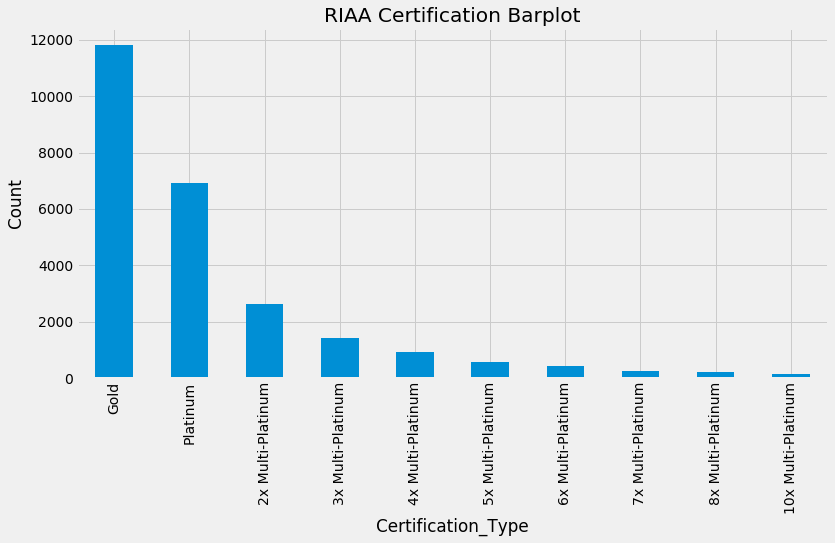

In [218]:
# First, let's look at the distribution of all awards given through the years...
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
riaa_datetimes.groupby('Certification_Type')['Title'].count().sort_values(ascending=False).head(10).plot.bar()
plt.title('RIAA Certification Barplot')
plt.ylabel('Count')
plt.show()

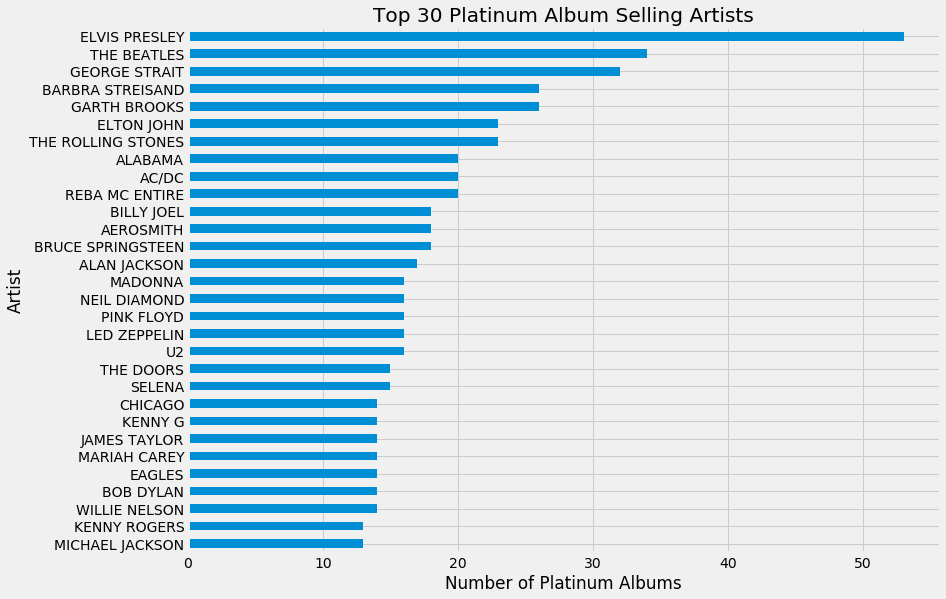

In [19]:
# The top 30 platinum album selling artists
platinums = riaa_datetimes[riaa_datetimes.Artist != 'VARIOUS']
platinums = platinums[platinums.Artist != 'SOUNDTRACK']
platinums = platinums[platinums.Certification_Type == 'Platinum']
platinums = platinums[platinums.Format_Type == 'ALBUM']
plt.figure(figsize=(12,9))
platinums.groupby('Artist')['Title'].count().sort_values(ascending = False).head(30).plot.barh().invert_yaxis()
plt.title('Top 30 Platinum Album Selling Artists')
plt.xlabel('Number of Platinum Albums')
plt.show()

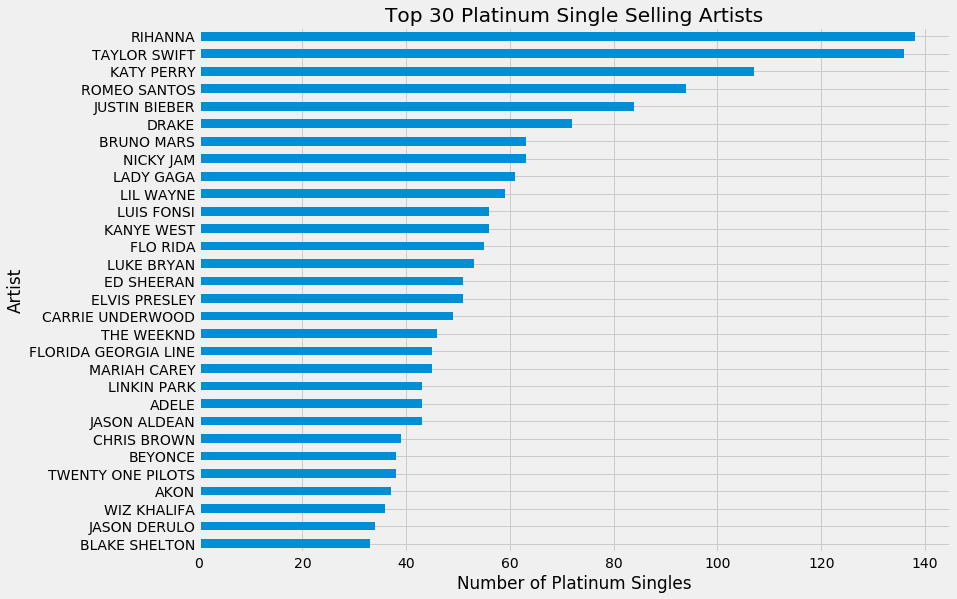

In [20]:
# The top 30 platinum album selling artists
splatinums = riaa_datetimes[riaa_datetimes.Artist != 'VARIOUS']
splatinums = splatinums[splatinums.Artist != 'SOUNDTRACK']
splatinums = splatinums[splatinums.Format_Type == 'SINGLE']
plt.figure(figsize=(12,9))
#no_various = no_various.drop_duplicates(subset = no_various.Title, keep = 'first')
splatinums.groupby('Artist')['Title'].count().sort_values(ascending = False).head(30).plot.barh().invert_yaxis()
plt.title('Top 30 Platinum Single Selling Artists')
plt.xlabel('Number of Platinum Singles')
plt.show()

At this point, one might notice a trend in the data. That is, artists with the highest count of platinum selling albums are generally before the internet (EX. Elvis, The Beatles, etc.). More importantly to this point, the artists with the highest count of platinum selling singles are far more recent (EX. Rihanna, Justin Bieber, etc.).
Given that this is true we can further understand why it is that modern artists are dominating singles, but older artists still hold the majority of the records in album sales.

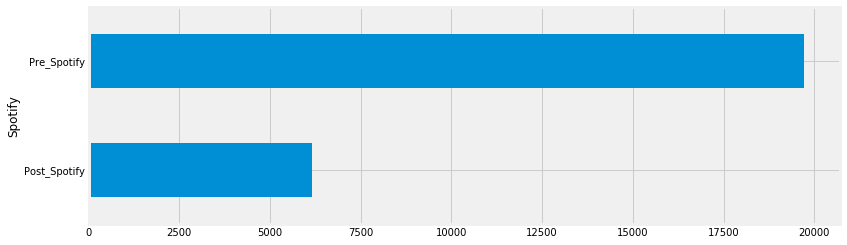

In [152]:
# Graph of data pre and post Spotify
plt.figure(figsize=(12,4))
riaa_datetimes.groupby('Spotify')['Format_Type'].count().sort_values(ascending = False).head(20).plot.barh().invert_yaxis()

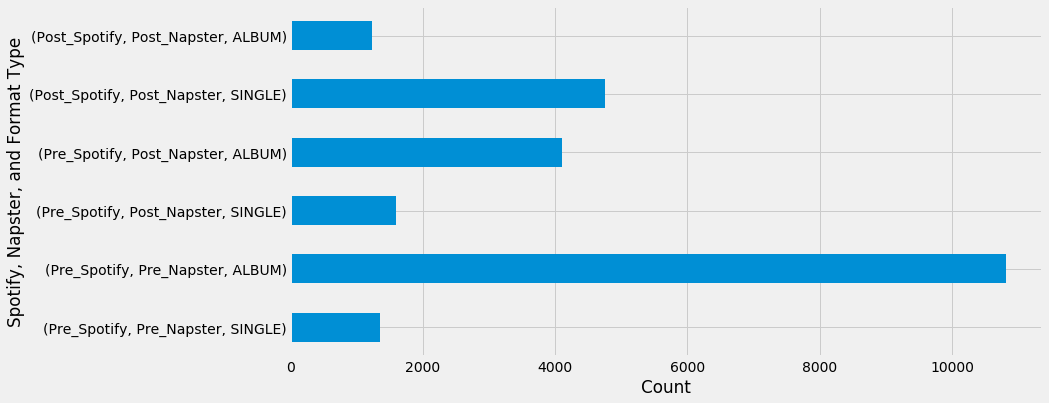

In [22]:
# Here we are plotting Album and Single in sepearte cetagories along with whether or not it was released before
# Napster and Spotify.
plt.figure(figsize=(12,6))
riaa_single_album = riaa_datetimes[(riaa_datetimes['Format_Type'] == 'SINGLE') | (riaa_datetimes['Format_Type'] == 'ALBUM')]
riaa_single_album.groupby(['Spotify', 'Napster','Format_Type'])['Title'].count().plot.barh().invert_yaxis()
plt.ylabel('Spotify, Napster, and Format Type')
plt.xlabel('Count')
plt.show()

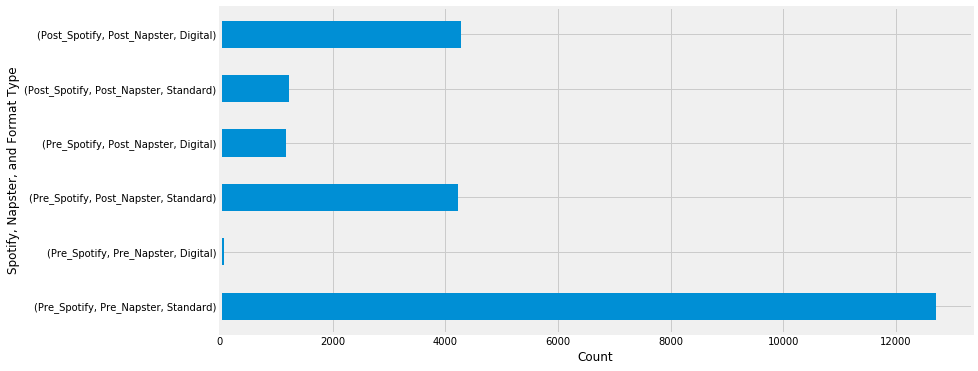

In [156]:
plt.figure(figsize=(12,6))
riaa_single_album = riaa_datetimes[(riaa_datetimes['Media_Type'] == 'Digital') | (riaa_datetimes['Media_Type'] == 'Standard')]
riaa_single_album.groupby(['Spotify', 'Napster','Media_Type'])['Title'].count().plot.barh().invert_yaxis()
plt.ylabel('Spotify, Napster, and Format Type')
plt.xlabel('Count')
plt.show()

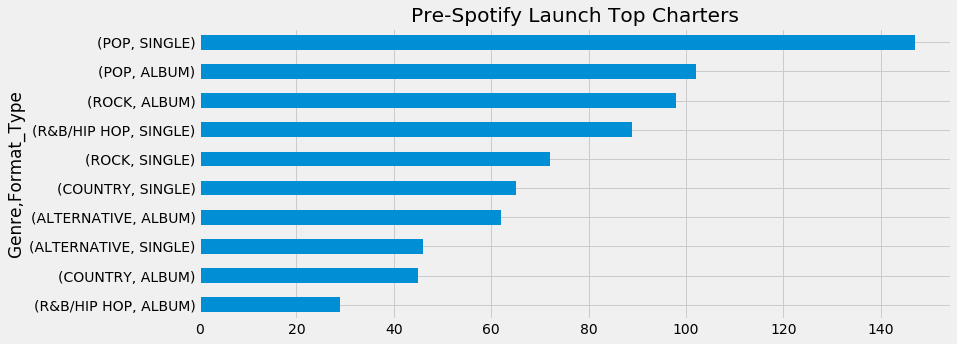

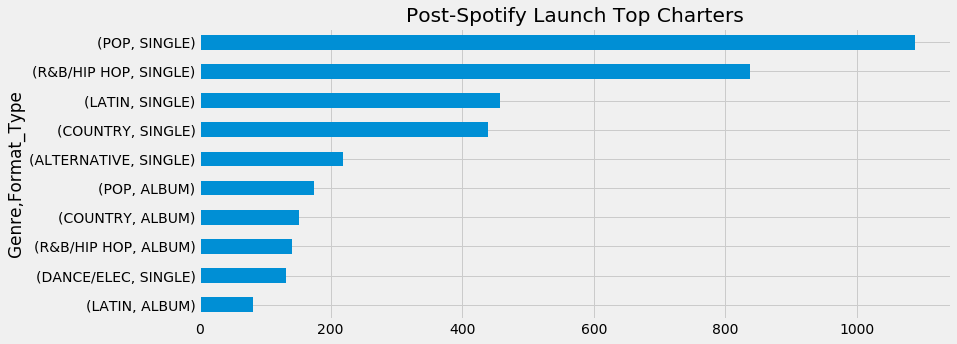

In [223]:
plt.figure(figsize=(12,5))
pre_spot = riaa_datetimes[(riaa_datetimes['Spotify'] == 'Pre_Spotify')]
pre_spot = pre_spot[pre_spot['Genre'] != 'None']
pre_spot.groupby(['Genre','Format_Type'])['Title'].count().sort_values(ascending=False).head(10).plot.barh().invert_yaxis()
plt.title('Pre-Spotify Launch Top Charters')
plt.figure(figsize=(12,5))
post_spot = riaa_datetimes[(riaa_datetimes['Spotify'] == 'Post_Spotify')]
post_spot = post_spot[post_spot['Genre'] != 'None']
post_spot.groupby(['Genre','Format_Type'])['Title'].count().sort_values(ascending=False).head(10).plot.barh().invert_yaxis()
plt.title('Post-Spotify Launch Top Charters')

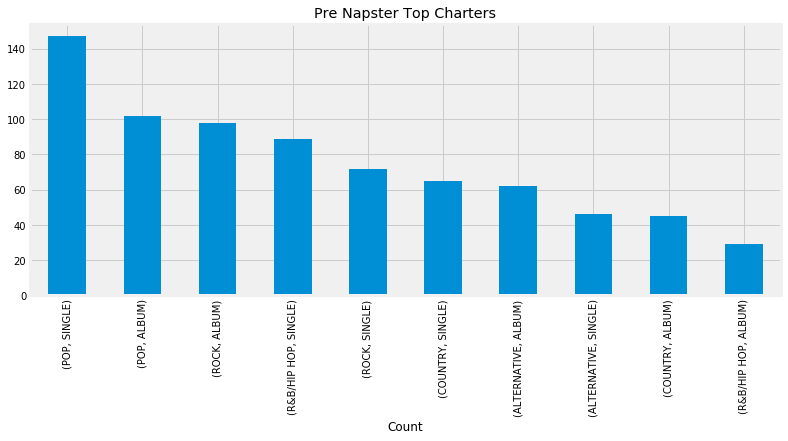

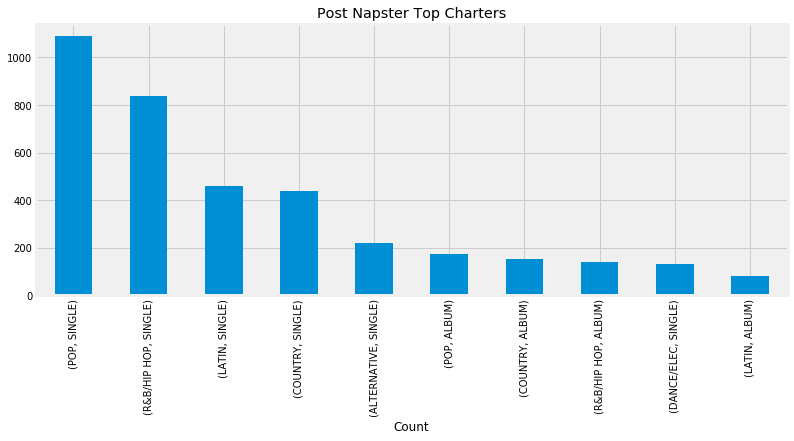

In [212]:
plt.figure(figsize=(12,5))
pre_spot2 = riaa_datetimes[(riaa_datetimes['Napster'] == 'Pre_Napster')]
pre_spot2 = pre_spot[pre_spot['Genre'] != 'None']
pre_spot2.groupby(['Genre','Format_Type'])['Title'].count().sort_values(ascending=False).head(10).plot.bar()
plt.title('Pre Napster Top Charters')
plt.xlabel('Count')
plt.figure(figsize=(12,5))
post_spot2 = riaa_datetimes[(riaa_datetimes['Napster'] == 'Post_Napster')]
post_spot2 = post_spot[post_spot['Genre'] != 'None']
post_spot2.groupby(['Genre','Format_Type'])['Title'].count().sort_values(ascending=False).head(10).plot.bar()
plt.title('Post Napster Top Charters')
plt.xlabel('Count')

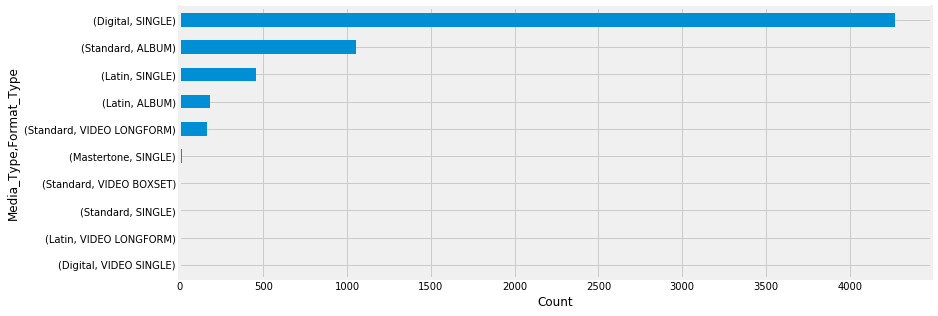

In [214]:
plt.figure(figsize=(12,5))
post_spot2 = riaa_datetimes[(riaa_datetimes['Napster'] == 'Post_Napster')]
post_spot2 = post_spot[post_spot['Genre'] != 'None']
post_spot2.groupby(['Media_Type','Format_Type'])['Title'].count().sort_values(ascending=False).head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.show()

In [34]:
riaa_datetimes
riaa_datetimes.to_csv('riaa_datetimes.csv') # export for R anova testing

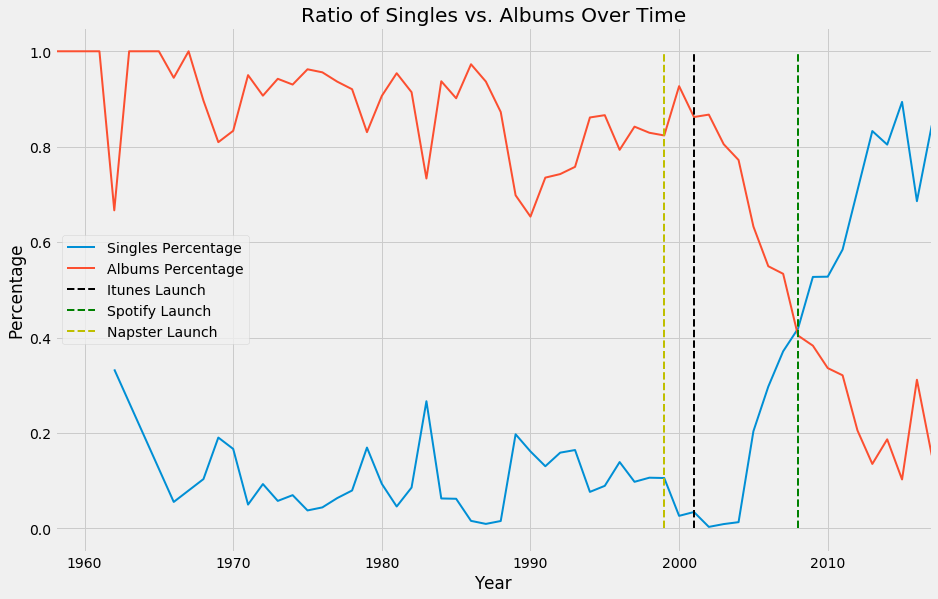

In [143]:
singles_ratio = riaa_datetimes[riaa_datetimes.Format_Type == 'SINGLE'].groupby('Certification_Year').count() / riaa_datetimes.groupby('Certification_Year').count()
albums_ratio = riaa_datetimes[riaa_datetimes.Format_Type == 'ALBUM'].groupby('Certification_Year').count() / riaa_datetimes.groupby('Certification_Year').count()

singles_ratio = singles_ratio['Title'].dropna()
albums_ratio = albums_ratio['Title'].dropna()

plt.figure(figsize=(14,9))
singles_ratio.plot(label = 'Singles Percentage', lw=2)
albums_ratio.plot(label = 'Albums Percentage', lw=2)
plt.plot([2001, 2001], [0, 1], 'k--', lw=2, label = 'Itunes Launch')
plt.plot([2008, 2008], [0, 1], 'g--', lw=2, label = 'Spotify Launch')
plt.plot([1999, 1999], [0, 1], 'y--', lw=2, label = 'Napster Launch')
plt.title('Ratio of Singles vs. Albums Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.show()

In [148]:
top_ten_albums = riaa_datetimes[riaa_datetimes.Format_Type == 'ALBUM']
top_ten_albums = top_albums.drop_duplicates('Title').sort_values('Sales', ascending = False)
top_ten_albums = top_albums[top_albums.Media_Type == 'Standard']
top_ten_albums.set_index(np.arange(0,len(top_albums),1), inplace = True) # resetting numerical indices
top_ten_albums[['Artist', 'Title', 'Sales']].head(10)

,Artist,Title,Sales
0,MICHAEL JACKSON,THRILLER,33000000
1,EAGLES,EAGLES/THEIR GREATEST HITS 1971 - 1975,29000000
2,LED ZEPPELIN,LED ZEPPELIN IV,23000000
3,PINK FLOYD,THE WALL,23000000
4,BILLY JOEL,GREATEST HITS VOLUME I & VOLUME II,23000000
5,AC/DC,BACK IN BLACK,22000000
6,GARTH BROOKS,DOUBLE LIVE,21000000
7,FLEETWOOD MAC,RUMOURS,20000000
8,SHANIA TWAIN,COME ON OVER,20000000
9,THE BEATLES,THE BEATLES,19000000
